In [3]:
import serial
ser= serial.Serial('/dev/ttyUSB0', 115200, timeout=0)


In [11]:
data=ser.read(10)
print(data)

b'\x00'


In [12]:
ser.close()

In [19]:
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))


In [17]:
a = b'\x02'
print(str(a)[-2])

2


# return 

In [6]:
# return 
global smoothSleepTime
smoothSleepTime = 0.05
def returnnnnn():
    mypose = rb.AUPose['StandardPose']
    mypose[34] = 105
    rb.switch_to_customizedPose(mypose)
    rb.connect_ros(True, False, steps=100)
    print('returnnnnn')

Total time 1.25
0.02931223075135632
69.45207491975228
0.038419985501565376
71.14611730329116
0.05021127319026653
73.33929681338958
0.06537533342557263
76.15981201715651
0.08471056573073579
79.75616522591686
0.10909682119561293
84.29200874238401
0.13943387296165005
89.9347003708669
0.17653527477911674
96.83556110891571
0.22097389222018782
105.10114395295494
0.27289178365887046
114.7578717605499
0.33181222783183395
125.71707437672111
0.3965167501352737
137.7521155251609
0.4650570548417855
150.5006122005721
0.5349429451582145
163.4993877994279
0.6034832498647263
176.2478844748391
0.668187772168166
188.28292562327889
0.7271082163411295
199.2421282394501
0.7790261077798123
208.8988560470451
0.8234647252208832
217.16443889108427
0.86056612703835
224.0652996291331
0.8909031788043871
229.707991257616
0.9152894342692642
234.24383477408315
0.9346246665744273
237.84018798284347
0.9497887268097336
240.66070318661045
0.9615800144984347
242.85388269670884
[-3.5, -3.22, -2.94, -2.66, -2.38, -2.1, -1.

<Figure size 432x288 with 0 Axes>

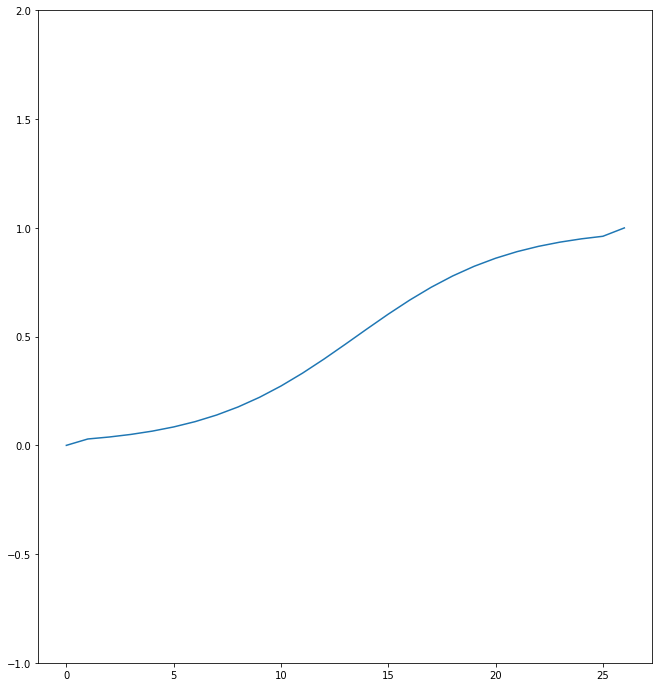

In [43]:
start = 64
end = 250
sleeptime = 0.05
stepNum = 25
sigmoid_factor = 7
print(f'Total time {sleeptime * stepNum}')
mid_steps = []
x = [0]
y = []

d1 = []
d2 = [0]

for i in range(stepNum):
    cur = start + (end - start) * sigmoid(sigmoid_factor * (i / stepNum - 0.5))
    print(sigmoid(sigmoid_factor * (i / stepNum - 0.5)))
    print(cur)
#     print(sigmoid_factor * (i / stepNum - 0.5))
    mid_steps.append(cur)
    d1.append(sigmoid_factor * (i / stepNum - 0.5))
    d2.append(sigmoid(sigmoid_factor * (i / stepNum - 0.5)))
    x.append(i+1)

x.append(x[-1]+1)
d2.append(1)
# print(mid_steps)
print(d1)
print(d2)

import matplotlib.pyplot as plt
plt.subplots_adjust(hspace=2, wspace=1)
fig = plt.figure(figsize=(11, 12))
p = 0
# axes[p] = plt.subplot(3, 2, p+1)
axes = plt.subplot()
#     axes[p].set_xlim([0, 5])
axes.set_ylim([-1, 2])
# axes.plot(x, d1)
axes.plot(x, d2)

# axes.set_title(f'sigmoid {s}', y=-0.2)

[4.05589861e-04 8.64292007e-03 1.80888133e-02 2.88920599e-02
 4.12105054e-02 5.52084583e-02 7.10529018e-02 8.89083206e-02
 1.08930008e-01 1.31255821e-01 1.55996508e-01 1.83224953e-01
 2.12964932e-01 2.45180271e-01 2.79765529e-01 3.16539503e-01
 3.55242822e-01 3.95540698e-01 4.37031416e-01 4.79260472e-01
 5.21739528e-01 5.63968584e-01 6.05459302e-01 6.45757178e-01
 6.84460497e-01 7.21234471e-01 7.55819729e-01 7.88035068e-01
 8.17775047e-01 8.45003492e-01 8.69744179e-01 8.92069992e-01
 9.12091679e-01 9.29947098e-01 9.45791542e-01 9.59789495e-01
 9.72107940e-01 9.82911187e-01 9.92357080e-01 1.00059441e+00]
[64, 66, 67, 69, 72, 74, 77, 81, 84, 88, 93, 98, 104, 110, 116, 123, 130, 138, 145, 153, 161, 169, 177, 184, 191, 198, 205, 211, 216, 221, 226, 230, 234, 237, 240, 243, 245, 247, 249, 250]
[2, 1, 2, 3, 2, 3, 4, 3, 4, 5, 5, 6, 6, 6, 7, 7, 8, 7, 8, 8, 8, 8, 7, 7, 7, 7, 6, 5, 5, 5, 4, 4, 3, 3, 3, 2, 2, 2, 1, 0]


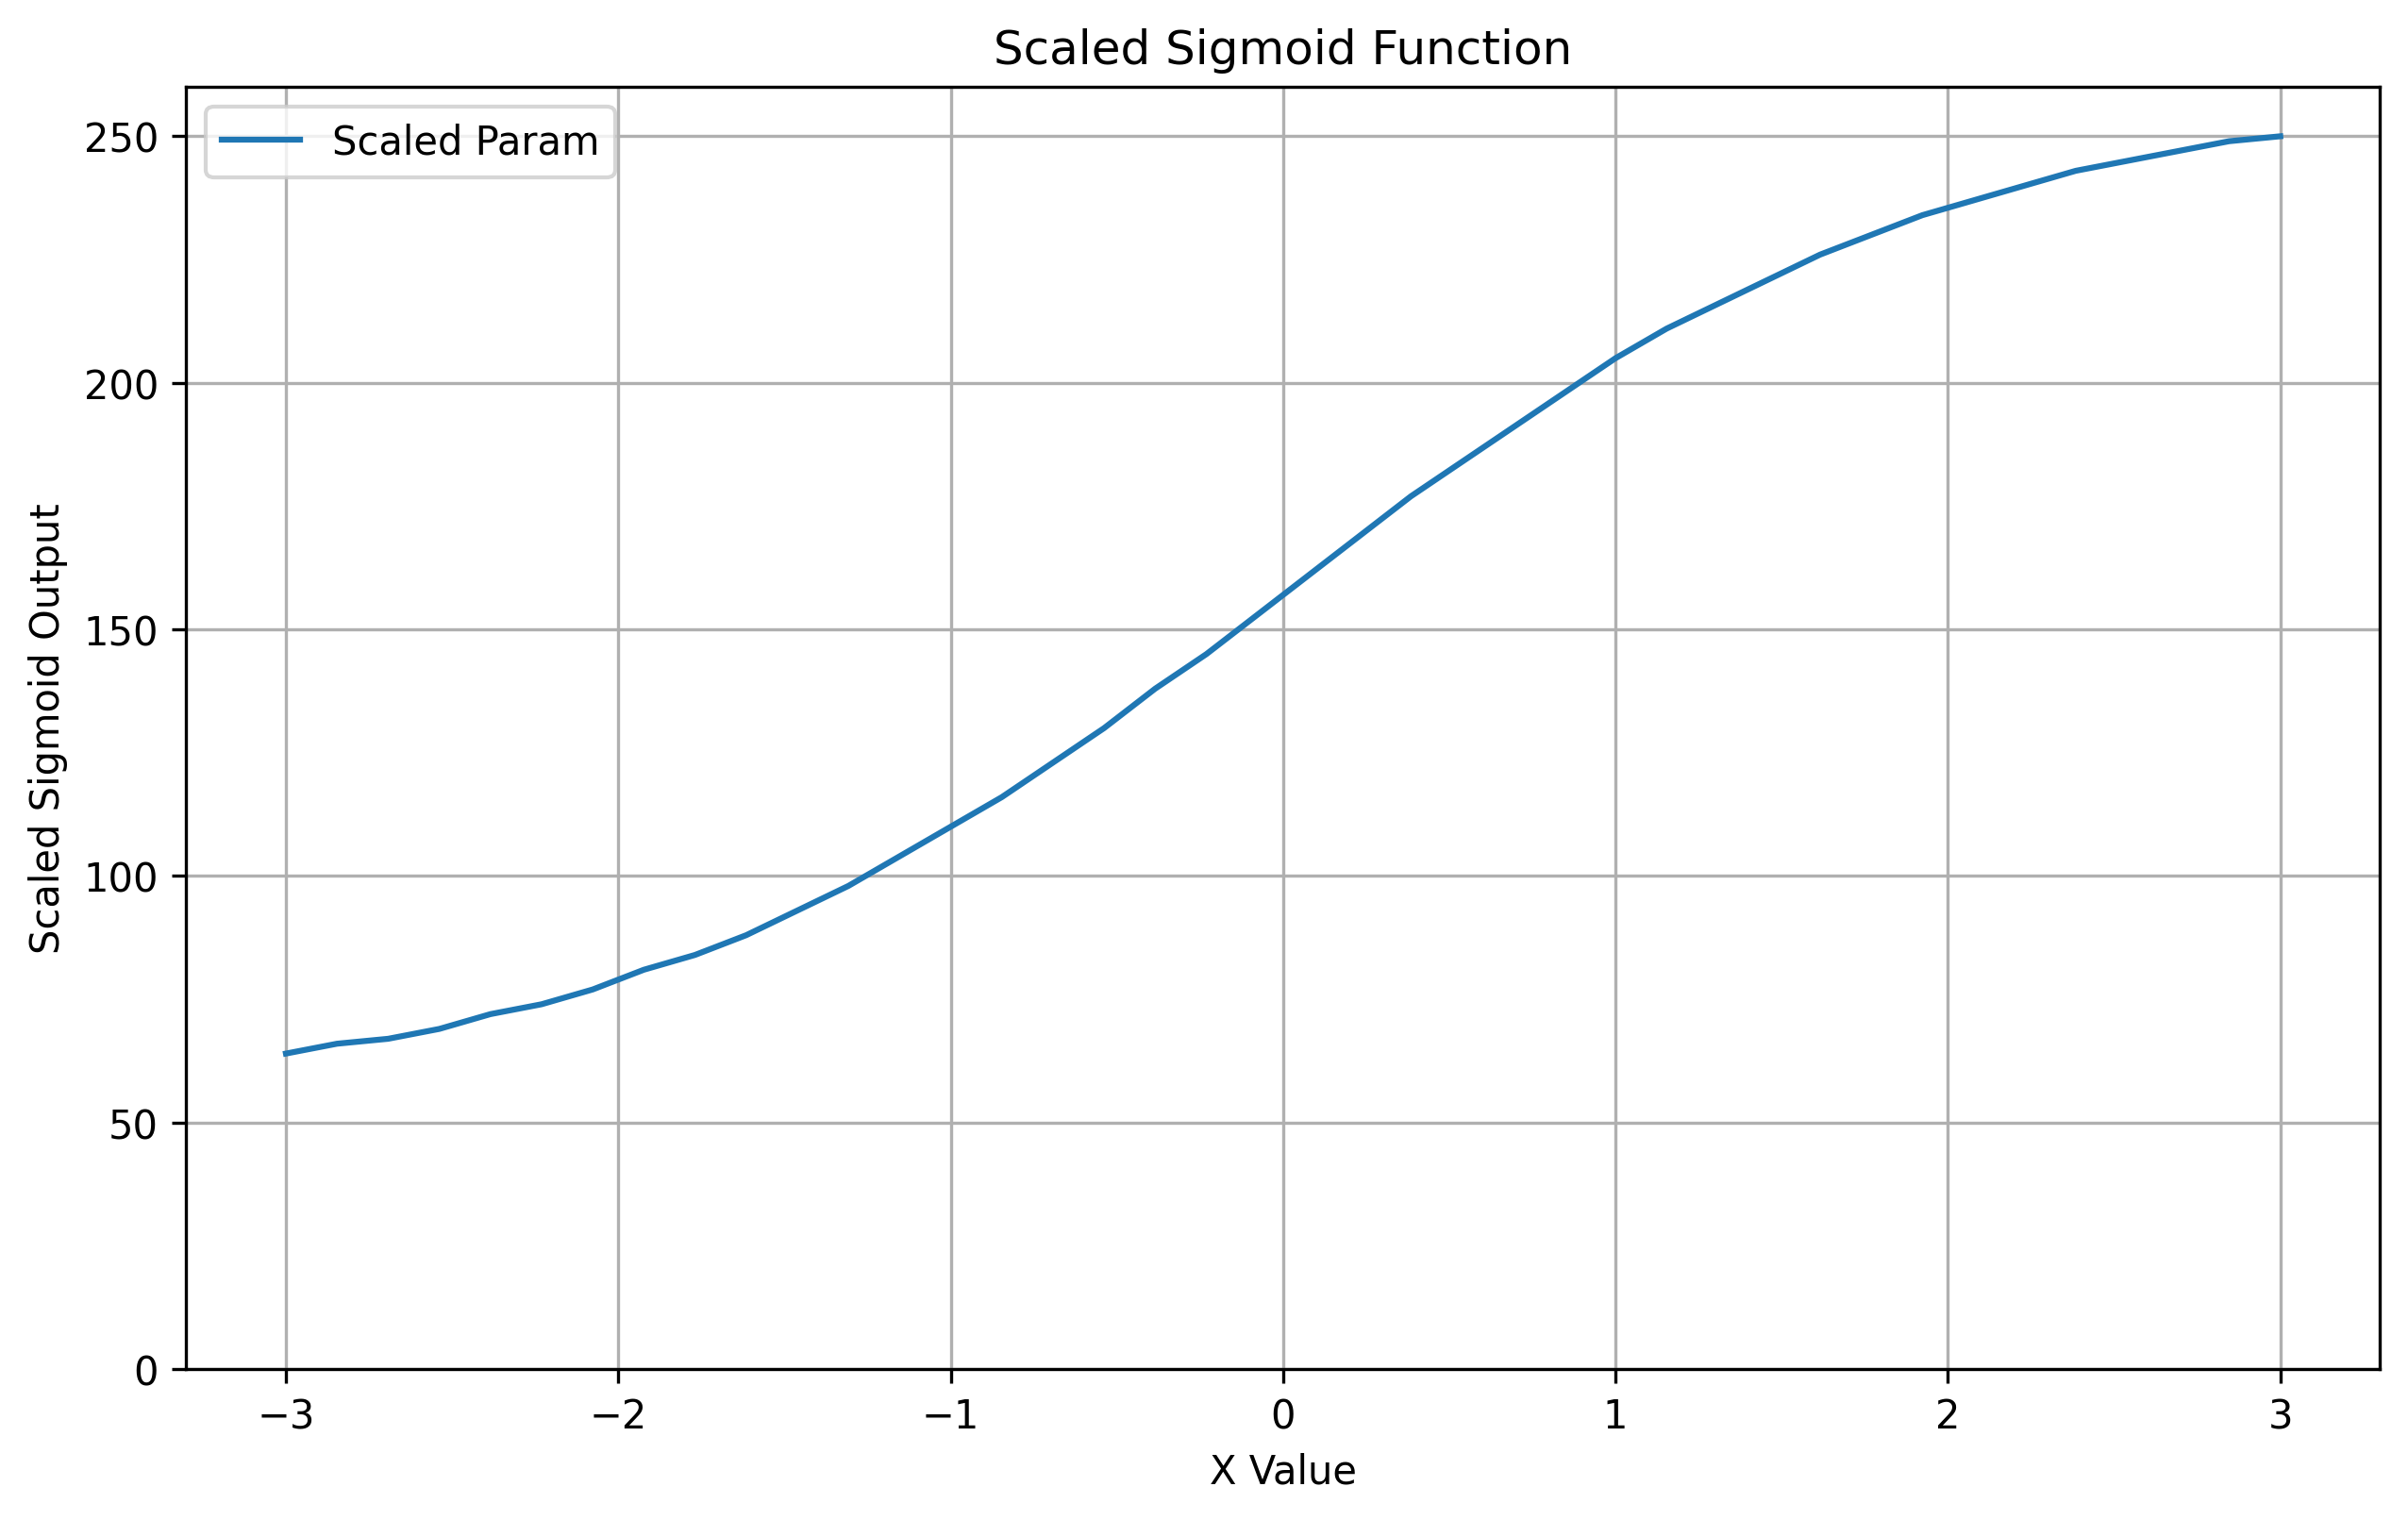

In [65]:
def scaled_sigmoid(x):
    return -0.052 + 1.105 * sigmoid(x)

# Generate x values for plotting
x_values_for_plot = np.linspace(-3, 3, 40)

# Apply the scaled sigmoid function
scaled_sigmoid_values = scaled_sigmoid(x_values_for_plot)
print(scaled_sigmoid_values)

# Map to the desired range, ensuring the first and last values are exactly start and end
mapped_values_smooth = start + (end - start) * scaled_sigmoid_values
mapped_values_smooth[0] = start
mapped_values_smooth[-1] = end
mapped_values_smooth = list(map(round, mapped_values_smooth))
print(mapped_values_smooth)
import copy
dd = copy.copy(mapped_values_smooth)
dd.append(dd[-1])
cc = []
for i in range(len(dd)-1):
    cc.append(dd[i+1] - dd[i])
print(cc)
# Plotting
plt.figure(figsize=(10, 6), dpi=300)
# plt.plot(x_values_for_plot, scaled_sigmoid_values, label="Scaled Sigmoid")
plt.plot(x_values_for_plot, mapped_values_smooth, label="Scaled Param")

plt.title("Scaled Sigmoid Function")
plt.xlabel("X Value")
plt.ylabel("Scaled Sigmoid Output")
plt.ylim(-0.5, 1.5)  # Extend y-axis to show the full range of scaled output
plt.ylim(0, 260)
plt.legend()
plt.grid(True)
# plt.show()
plt.savefig('scaled sigmoid function.png', dpi=300, bbox_inches='tight')


In [30]:
mapped_values_40_steps

array([ 85.85827782,  87.98153118,  90.27869821,  92.75777808,
        95.42611552,  98.29127811, 101.35633582, 104.62427702,
       108.09651169, 111.77293354, 115.64827135, 119.71607004,
       123.96749521, 128.39075643, 132.96939731, 137.68531554,
       142.51812141, 147.44460456, 152.43906564, 157.47501091,
       162.52498909, 167.56093436, 172.55539544, 177.48187859,
       182.31468446, 187.03060269, 191.60924357, 196.03250479,
       200.28392996, 204.35172865, 208.22706646, 211.90348831,
       215.37572298, 218.64366418, 221.70872189, 224.57388448,
       227.24222192, 229.72130179, 232.01846882, 234.14172218])

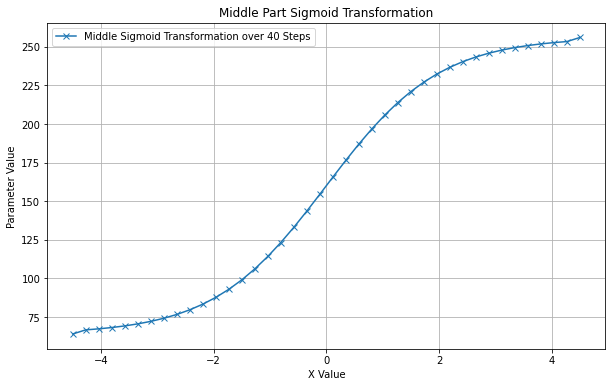

array([64.        , 66.64949499, 67.32530959, 68.16971019, 69.2225954 ])

In [38]:
def middle_sigmoid_transformation(start, end, steps=40, x_range=(-4.5, 4.5)):
    """
    Generate a transformation using the middle part of the sigmoid function to ensure a balanced transition
    without too flat initial steps or too steep changes, spanning from start to end over a specified number of steps.
    """
    # Interpolate 40 x values within the selected x range for the middle part of the sigmoid
    x_values_middle = np.linspace(x_range[0], x_range[1], steps)

    # Compute sigmoid values for these x values
    sigmoid_values_middle = sigmoid(x_values_middle)

    # Map to the desired range, ensuring the first and last values are exactly start and end
    mapped_values_middle = start + (end - start) * sigmoid_values_middle
    mapped_values_middle[0] = start
    mapped_values_middle[-1] = end

    return x_values_middle, mapped_values_middle

# Generate a transformation using the middle part of the sigmoid from 64 to 256 over 40 steps
x_values_middle, mapped_values_middle = middle_sigmoid_transformation(64, 256)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_values_middle, mapped_values_middle, label="Middle Sigmoid Transformation over 40 Steps", marker='x')
plt.title("Middle Part Sigmoid Transformation")
plt.xlabel("X Value")
plt.ylabel("Parameter Value")
plt.legend()
plt.grid(True)
plt.show()

mapped_values_middle[:5]  # Display the first 5 steps to inspect the initial slope
